In [1]:
import pandas as pd

df = pd.read_csv('../data/s1_ic.csv', index_col=False)

generations = df['gen']
n_features = 200
features = [f"x{i}" for i in range(n_features)]
target = 'performance'

X, y = df[features], df[target]

In [2]:
print(y.describe())
print(y.median())

count    691.000000
mean      13.666016
std       22.958806
min      -94.585805
25%       12.229522
50%       14.861730
75%       20.929732
max       52.128397
Name: performance, dtype: float64
14.86172987938556


Text(0.5, 1.0, 'Bipedal Centroid Evolution')

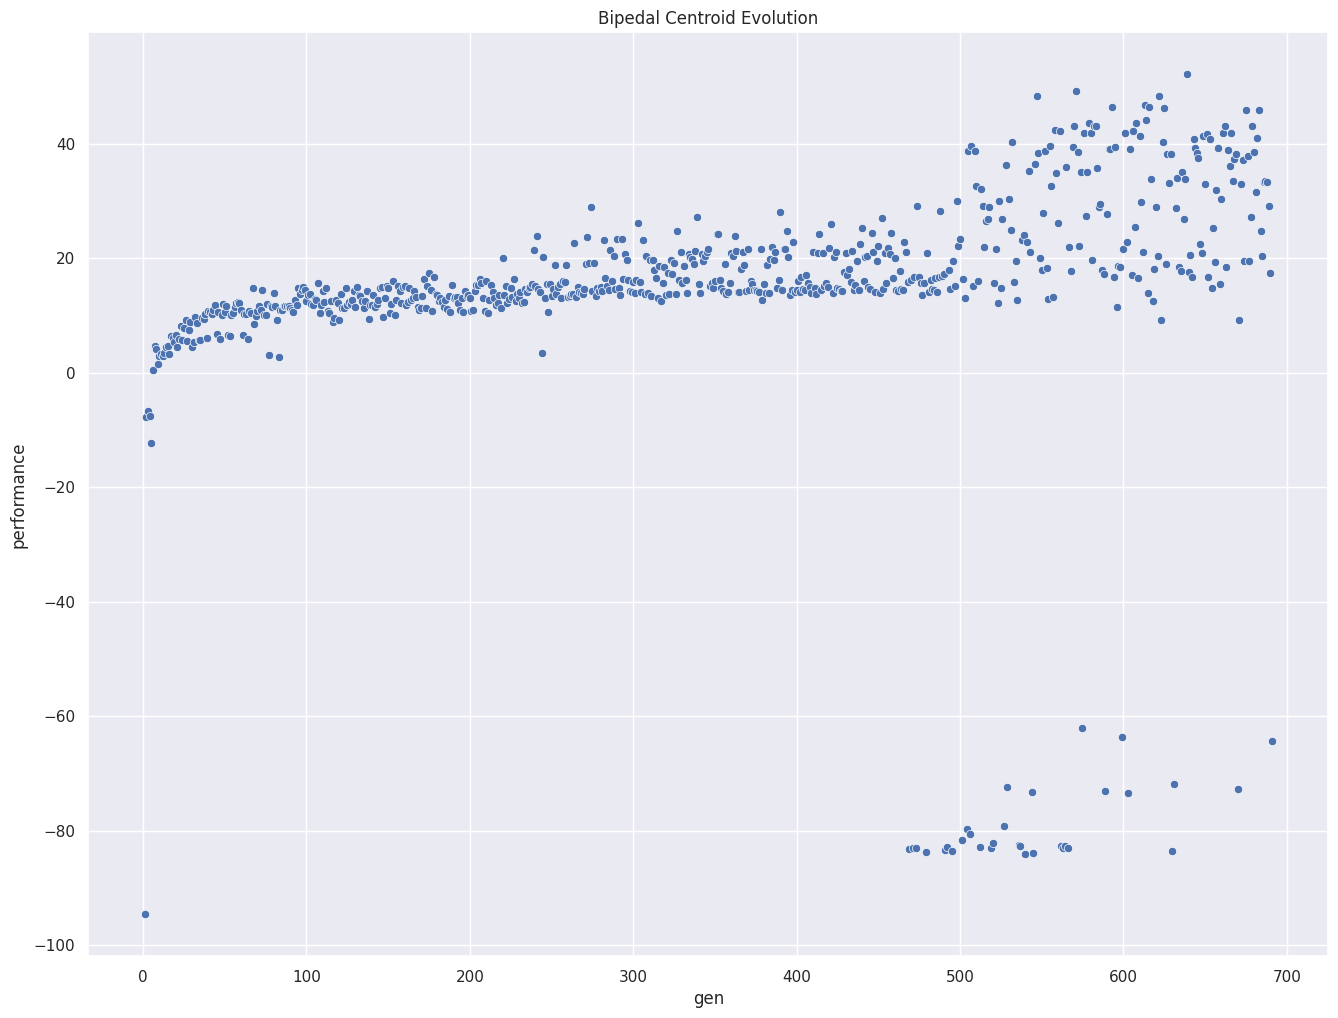

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,12)})

sns.scatterplot(x=generations, y=y)
plt.title("Bipedal Centroid Evolution")

Text(0.5, 1.0, 'Bipedal Evolution')

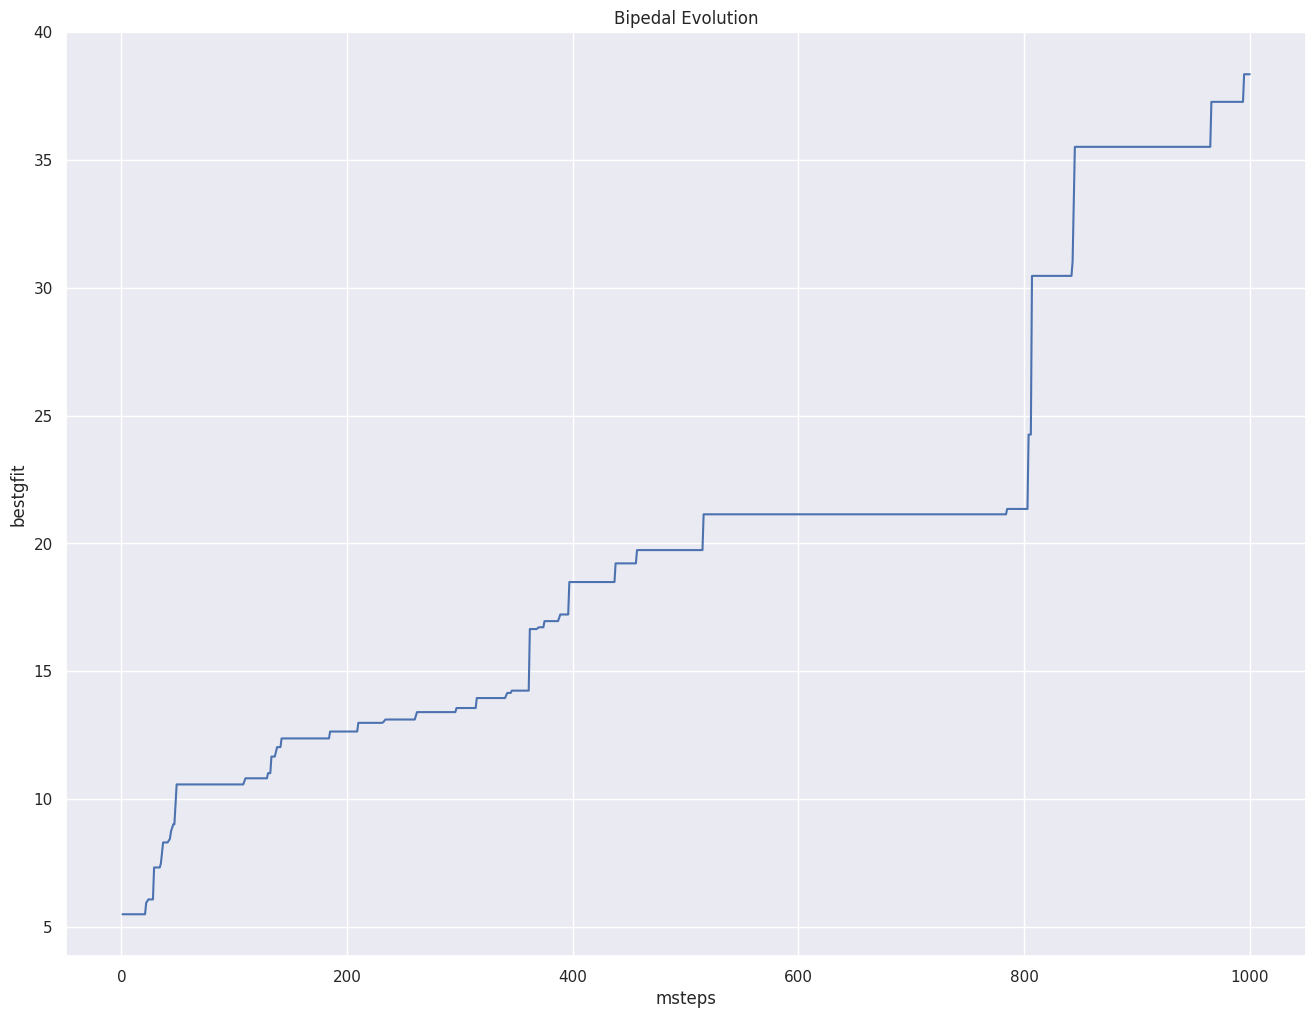

In [11]:
stats = pd.read_csv("../data/s1_stats.csv", index_col=False)
stats = stats[1:]

sns.lineplot(x=stats['msteps'], y=stats['bestgfit'])
plt.title("Bipedal Evolution")

In [4]:
from sklearn.neural_network import MLPClassifier

params = dict(
    activation='relu',
    alpha=0.001,
    hidden_layer_sizes=(256,128,256),
    solver='adam'
)

clf = MLPClassifier(**params)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X, y)

label_rule = lambda yi: 'good' if yi > y.median() else 'bad'
labels = [label_rule(yi) for yi in y]


In [6]:
batch = 5
cycle = 1
model_score = []
data = None

for i in range(0, len(generations), batch):
    if cycle:
        if data:
            x_, y_ = data
            score = clf.score(x_, y_)
            model_score.append(score)
        cycle = 0
        data = X[i:i+batch], labels[i:i+batch]
    else:
        if data:
            x_, y_ = data
            clf.partial_fit(x_, y_, classes=['bad', 'good'])
            cycle = 1

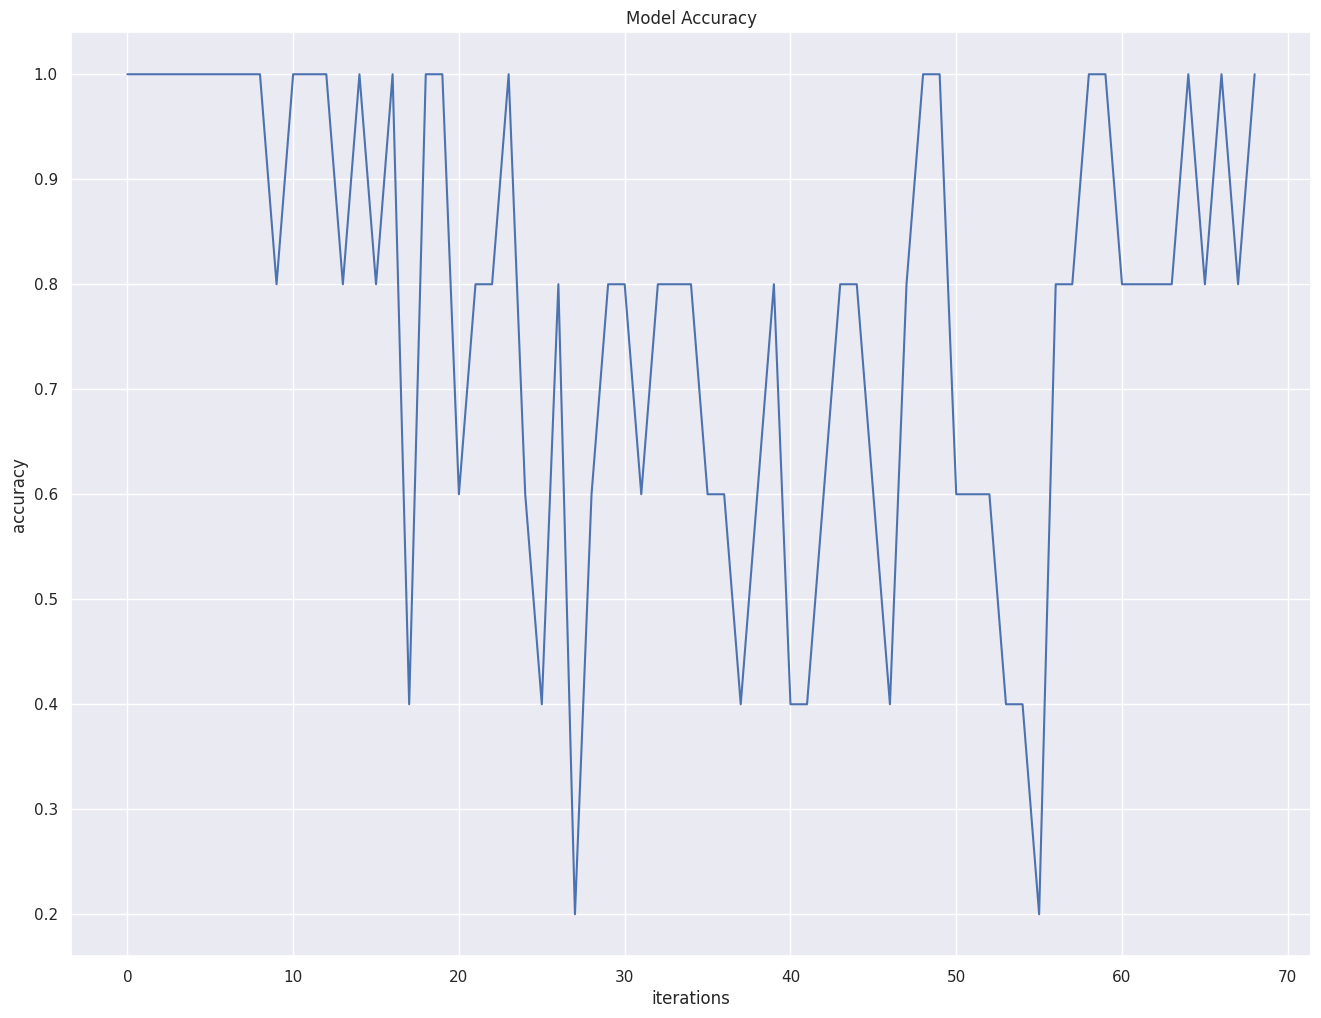

In [7]:
sns.lineplot(model_score)
plt.xlabel("iterations")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.show()